In [1]:
# Importing necessary libraries
import json
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score

In [2]:
# Setting the path to the JSON file
DATA_PATH = "data.json"

In [3]:
# Function to load data from the JSON file
def load_data(data_path):
    with open(data_path, "r") as fp:
        data = json.load(fp)
    X = np.array(data["MFCCs"])
    y = np.array(data["labels"])
    return X, y

In [4]:
# Function to prepare datasets
def prepare_datasets(test_size, validation_size):
    # Loading data and splitting it into train, validation, and test sets
    X, y = load_data(DATA_PATH)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=1)
    X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=validation_size)

    # add an axis to input sets
    X_train = X_train[..., np.newaxis]
    X_validation = X_validation[..., np.newaxis]
    X_test = X_test[..., np.newaxis]

    return X_train, X_validation, X_test, y_train, y_validation, y_test

In [5]:
# Fungsi ini mengambil input_shape sebagai parameter, yang merepresentasikan bentuk data masukan yang akan diterima oleh model.
def build_model(input_shape):
    # Ini membuat model sequential di mana layer ditambahkan secara berurutan.
    model = keras.Sequential()

    # Tiga layer konvolusi berturut-turut ditambahkan ke dalam model.
    # Setiap layer konvolusi memiliki 128 filter dengan kernel 3x3 dan menggunakan fungsi aktivasi Rectified Linear Unit (ReLU).
    # Layer MaxPooling2D dengan ukuran pool 2x2 dan "same" padding ditambahkan setelah setiap layer konvolusi.
    # BatchNormalization diterapkan setelah setiap layer pooling.
    model.add(keras.layers.Conv2D(128, (3, 3), activation='relu', input_shape=input_shape))
    model.add(keras.layers.MaxPooling2D((2, 2), strides=(1, 1), padding='same'))
    model.add(keras.layers.BatchNormalization())

    # 2nd conv layer
    model.add(keras.layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(keras.layers.MaxPooling2D((2, 2), strides=(1, 1), padding='same'))
    model.add(keras.layers.BatchNormalization())

    # 3rd conv layer
    model.add(keras.layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(keras.layers.MaxPooling2D((2, 2), strides=(1, 1), padding='same'))
    model.add(keras.layers.BatchNormalization())

    # Layer Flatten ditambahkan untuk mengubah output 2D dari layer sebelumnya menjadi array 1D,
    # mempersiapkannya untuk layer fully connected.
    model.add(keras.layers.Flatten())

    # Dua layer fully connected (Dense) ditambahkan dengan masing-masing 32 dan 64 neuron,
    # menggunakan fungsi aktivasi ReLU.
    model.add(keras.layers.Dense(32, activation='relu'))
    model.add(keras.layers.Dense(64, activation='relu'))
    
    # Layer Dropout ditambahkan dengan tingkat dropout sebesar 0.5. Dropout adalah teknik
    # regularisasi yang membantu mencegah overfitting dengan secara acak mengatur sebagian
    # unit input menjadi nol selama pelatihan.
    model.add(keras.layers.Dropout(0.5))

    # Layer output ditambahkan dengan 10 neuron (diasumsikan ini adalah tugas
    # klasifikasi dengan 10 kelas) dan menggunakan fungsi aktivasi softmax untuk
    # mendapatkan distribusi probabilitas atas kelas-kelas.
    model.add(keras.layers.Dense(10, activation='softmax'))

    return model

In [6]:
# Fungsi ini digunakan untuk membuat prediksi menggunakan model yang telah dilatih.
def predict(model, X, y):
    # X adalah data masukan yang akan diprediksi.
    # menambahkan dimensi tambahan pada array X untuk membuatnya sesuai dengan bentuk yang diharapkan oleh model.
    X = X[np.newaxis, ...] 

    # menghasilkan prediksi berdasarkan data masukan.
    prediction = model.predict(X)
    
    # digunakan untuk mendapatkan indeks kelas dengan nilai probabilitas tertinggi.
    predicted_index = np.argmax(prediction, axis=1)

    print("Target: {}, Predicted label: {}".format(y, predicted_index))

In [7]:
# Dua dataset (X_train, X_validation) dipersiapkan menggunakan fungsi prepare_datasets.
X_train, X_validation, X_test, y_train, y_validation, y_test = prepare_datasets(0.1, 0.2)

In [8]:
# Bentuk input untuk model dihitung berdasarkan bentuk X_train.
input_shape = (X_train.shape[1], X_train.shape[2], 1)
# Model dibangun menggunakan fungsi build_model dengan bentuk input yang telah dihitung.
model = build_model(input_shape)

In [9]:
# Optimizer Adam dengan learning rate 0.0001 digunakan, dan model dikompilasi
# dengan fungsi kerugian ('sparse_categorical_crossentropy') dan metrik ('accuracy').
optimiser = keras.optimizers.Adam(learning_rate=0.0001)

# Pelatihan model dilakukan dengan memanggil model.fit menggunakan dataset pelatihan
# (X_train, y_train) dan dataset validasi (X_validation, y_validation).
model.compile(optimizer=optimiser,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
# Pelatihan dilakukan selama 50 epoch dengan ukuran batch 8.
history = model.fit(X_train, y_train, validation_data=(X_validation, y_validation), batch_size=8, epochs=50)

Epoch 1/50
45/45 [==============================] - 12s 193ms/step - loss: 2.5997 - accuracy: 0.1152 - val_loss: 2.3027 - val_accuracy: 0.1124
Epoch 2/50
45/45 [==============================] - 10s 220ms/step - loss: 2.2539 - accuracy: 0.1433 - val_loss: 2.2786 - val_accuracy: 0.1461
Epoch 3/50
45/45 [==============================] - 12s 266ms/step - loss: 2.1913 - accuracy: 0.1770 - val_loss: 2.2010 - val_accuracy: 0.2809
Epoch 4/50
45/45 [==============================] - 12s 276ms/step - loss: 2.1806 - accuracy: 0.2135 - val_loss: 2.2314 - val_accuracy: 0.1461
Epoch 5/50
45/45 [==============================] - 11s 239ms/step - loss: 2.1280 - accuracy: 0.2444 - val_loss: 2.2250 - val_accuracy: 0.2360
Epoch 6/50
45/45 [==============================] - 11s 248ms/step - loss: 2.0796 - accuracy: 0.2360 - val_loss: 2.0972 - val_accuracy: 0.2697
Epoch 7/50
45/45 [==============================] - 11s 253ms/step - loss: 2.0126 - accuracy: 0.2584 - val_loss: 2.1103 - val_accuracy: 0.2697

In [11]:
# Function to plot training history
def plot_history(history):
    # Plotting accuracy and loss for training/validation sets
    fig, axs = plt.subplots(2, figsize=(10, 8), gridspec_kw={'hspace': 0.5})  # Tambahkan figsize dan hspace

    # create accuracy subplot
    axs[0].plot(history.history["accuracy"], label="train accuracy")
    axs[0].plot(history.history["val_accuracy"], label="validation accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy Evaluation")

    # create error subplot
    axs[1].plot(history.history["loss"], label="train error")
    axs[1].plot(history.history["val_loss"], label="validation error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error Evaluation")

    plt.show()


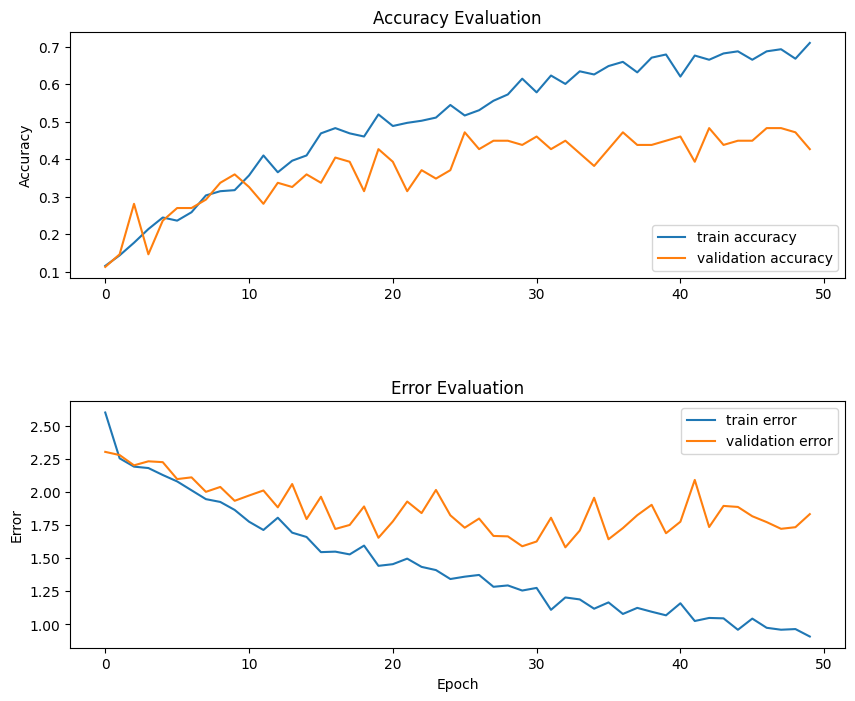

In [12]:
# Plotting accuracy/error for training and validation
plot_history(history)


In [13]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Fungsi ini mengambil model yang telah dilatih (model), data uji (X_test),
# dan label sebenarnya untuk data uji (y_test) sebagai parameter.
def generate_classification_report(model, X_test, y_test):

    #  menghasilkan prediksi model untuk data uji.
    predictions = model.predict(X_test)

    # mengambil indeks kelas dengan nilai probabilitas tertinggi sebagai prediksi.
    y_pred = np.argmax(predictions, axis=1)


    print("Classification Report:")

    # zero_division=1 digunakan untuk menangani pembagian dengan nol dalam kasus di mana ada kelas yang tidak diprediksi.
    print(classification_report(y_test, y_pred, zero_division=1))

    # Menghitung dan mencetak akurasi menggunakan accuracy_score dari scikit-learn.
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.2%}")

    # Menghitung dan mencetak matriks kebingungan (confusion matrix) menggunakan confusion_matrix dari scikit-learn.
    conf_matrix = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(conf_matrix)

    return y_pred

# Memanggil fungsi generate_classification_report untuk mengevaluasi model menggunakan data uji dan menyimpan hasil prediksi.
y_pred = generate_classification_report(model, X_test, y_test)


2/2 [==============================] - 0s 84ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.60      0.60         5
           1       0.43      0.75      0.55         4
           2       1.00      0.00      0.00         4
           3       0.64      1.00      0.78         7
           4       0.44      0.80      0.57         5
           5       0.25      0.60      0.35         5
           6       1.00      0.22      0.36         9
           7       1.00      0.00      0.00         3
           8       0.00      0.00      1.00         3
           9       1.00      0.40      0.57         5

    accuracy                           0.48        50
   macro avg       0.64      0.44      0.48        50
weighted avg       0.67      0.48      0.49        50

Accuracy: 48.00%
Confusion Matrix:
[[3 0 0 0 0 2 0 0 0 0]
 [1 3 0 0 0 0 0 0 0 0]
 [0 0 0 2 1 1 0 0 0 0]
 [0 0 0 7 0 0 0 0 0 0]
 [0 0 0 0 4 1 0 0 0 0]
 [0 1 0 0 0 3 0 

In [14]:
from sklearn.metrics import confusion_matrix

# Hitung confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Menampilkan matriks
print("Confusion Matrix:")
print(conf_matrix)

# Mendapatkan nilai TP, TN, FP, FN
TP = conf_matrix[1, 1]  # True Positive
TN = conf_matrix[0, 0]  # True Negative
FP = conf_matrix[0, 1]  # False Positive
FN = conf_matrix[1, 0]  # False Negative

print(f"True Positive (TP): {TP}")
print(f"True Negative (TN): {TN}")
print(f"False Positive (FP): {FP}")
print(f"False Negative (FN): {FN}")


Confusion Matrix:
[[3 0 0 0 0 2 0 0 0 0]
 [1 3 0 0 0 0 0 0 0 0]
 [0 0 0 2 1 1 0 0 0 0]
 [0 0 0 7 0 0 0 0 0 0]
 [0 0 0 0 4 1 0 0 0 0]
 [0 1 0 0 0 3 0 0 1 0]
 [0 2 0 1 0 3 2 0 1 0]
 [0 1 0 0 1 1 0 0 0 0]
 [0 0 0 1 2 0 0 0 0 0]
 [1 0 0 0 1 1 0 0 0 2]]
True Positive (TP): 3
True Negative (TN): 3
False Positive (FP): 0
False Negative (FN): 1


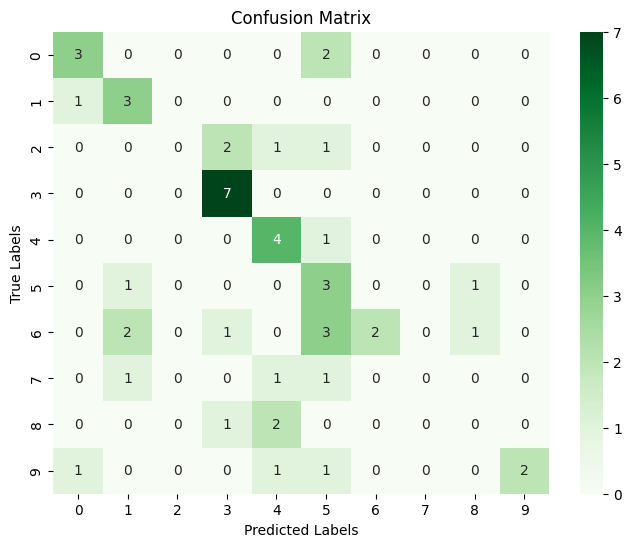

In [15]:
import seaborn as sns
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
